### Q1. What does the primary analysis of several categorical features reveal?

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 21) 
pd.set_option('display.max_rows', 41188) 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics  
from sklearn.feature_selection import SelectFromModel


In [2]:
df=pd.read_csv("bank.csv",sep=';')


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape # Reading Rows And Columns From Dataset

(41188, 21)

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
df.describe() # Returns The Statistical Summary  For NUMERICAL DATA

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.describe(include='all') # Returns The Statistical Summary  For  CATEGORICAL DATA

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [11]:
categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in train dataset
categorical_features.columns

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_16316/1888521553.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in train dataset


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

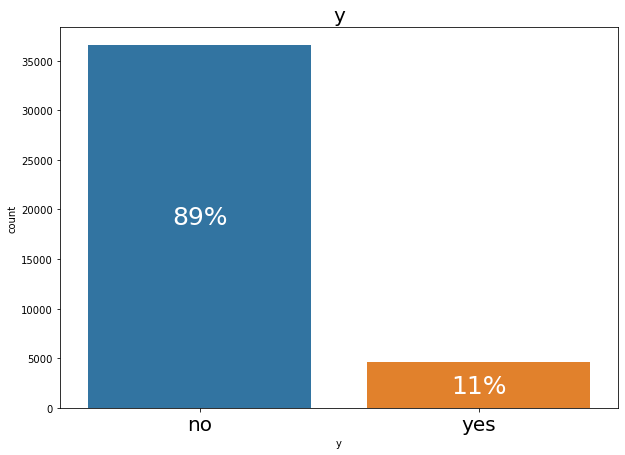

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x="y", data=df)
percentage_y = df['y'].agg('value_counts', normalize=True) * 100
plt.title("y",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.text(0, 18000, "{:.2g}%".format(percentage_y[0]),  ha='center', va='bottom', size=25, color='w')
plt.text(1, 1000, "{:.2g}%".format(percentage_y[1]),  ha='center', va='bottom', size=25, color='w')
plt.show()

# a. Missing Value Analysis

In [13]:
df.isnull().sum() # Finding The Null Values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

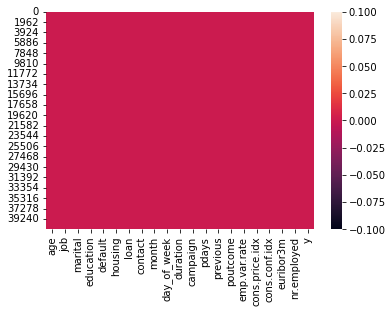

In [14]:
sns.heatmap(df.isnull()) # Visualising Null Values In The FOrm Of HeatMap

### There are no null values in bank dataset

# b. Label Encoding wherever required

In [15]:
label_encoder = LabelEncoder()
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])
df['y'] = label_encoder.fit_transform(df['y'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# c. Selecting important features based on Random Forest


In [17]:
from sklearn.ensemble import RandomForestClassifier


In [18]:
X= df.drop("y", axis = 1)


In [19]:
Y= df["y"]


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

In [23]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train,Y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [24]:
sel.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True])

In [25]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [26]:
print(selected_feat)

Index(['age', 'duration', 'euribor3m', 'nr.employed'], dtype='object')


# d. Handling unbalanced data using SMOTE


In [28]:
Y_train.value_counts()


0    25579
1     3252
Name: y, dtype: int64

In [29]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(random_state=42)
X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train)

In [34]:
Y_train_sm.value_counts()


0    25579
1    25579
Name: y, dtype: int64

# e. Standardize the data using the anyone of the scalers provided by sklearn

In [35]:
x=df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'y'],axis=1)
y=df['y']

In [36]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0)

In [37]:
scaler=StandardScaler()


In [38]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Q3. Build the following Supervised Learning models:
# a. Logistic Regression


In [40]:
from sklearn.linear_model import LogisticRegression


In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
predictions=model.predict(x_test)


In [43]:
model.score(x_train,y_train)


0.9020845617564427

In [44]:
model.score(x_test,y_test)


0.9066116371287529

# b. AdaBoost

In [45]:
from sklearn.ensemble import AdaBoostClassifier


In [46]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [47]:
model.score(x_train, y_train)


0.9030210537268912

In [48]:
model.score(x_test, y_test)


0.9072590434571498

# c. Naïve Bayes

In [49]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

#Predict the response for test dataset
y_predict = gnb.predict(x_test)

In [50]:
gnb.score(x_train, y_train)


0.8869966355658839

In [51]:
gnb.score(x_test, y_test)


0.893825362142915

# d. KNN


In [52]:
from sklearn.neighbors import KNeighborsClassifier


In [53]:
NNHH = KNeighborsClassifier(n_neighbors= 49 ,metric='euclidean' )


In [54]:
NNHH.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=49)

In [55]:
y_predi = NNHH.predict(x_test)


In [56]:
NNHH.score(x_train, y_train)


0.9103742499393015

In [57]:
NNHH.score(x_test, y_test)


0.909686817188638

# e. SVM

In [58]:
from sklearn import svm
svm = svm.SVC(kernel='linear',gamma=0.025, C=3) 
svm.fit(x_train, y_train)
y_preds = svm.predict(x_test)

In [59]:
svm.score(x_train, y_train)


0.8940376677881448

In [60]:
svm.score(x_test, y_test)


0.8949583232176095

# Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or no

In [74]:
# Application of all Machine Learning methods
MLA = [model,abc,gnb,NNHH,svm]

In [75]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [78]:
# Printing the table
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
3,KNeighborsClassifier,0.9104,0.9097,0.641079,0.445245,0.706851
0,AdaBoostClassifier,0.9030,0.9073,0.652010,0.373919,0.674333
1,AdaBoostClassifier,0.9030,0.9073,0.652010,0.373919,0.674333
4,SVC,0.8940,0.8950,0.656250,0.136167,0.563571
2,GaussianNB,0.8870,0.8938,0.523515,0.609510,0.769656


## conclusion

 ### KNeighborsClassifier gives best score when compare to other models

# Part II: Time Series

# MonthWiseMarketArrivals_Clean

In [107]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [61]:
df1=pd.read_csv("MonthWiseMarketArrivals_Clean.csv")


In [62]:
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [63]:
df1.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


In [80]:
df1.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [84]:
df1.shape


(10227, 10)

# Q1. Get the modal price of onion for each month for the Mumbai  market (Hint: set monthly date as index and drop  redundant columns)


In [135]:
df1.date= pd.DatetimeIndex(df1.date)


In [136]:
df1.index = pd.PeriodIndex(df1.date, freq="M")
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [104]:
df_Mumbai = df1.loc[df1.city == "MUMBAI"].copy()
df_Mumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [105]:
df_Mumbai = df_Mumbai.drop(["market","date","year","priceMin","priceMax","state","city"], axis=1)
df_Mumbai.head()

,month,quantity,priceMod
date,,,
2004-01,January,267100,849
2005-01,January,275845,387
2006-01,January,228000,402
2007-01,January,205200,997
2008-01,January,267550,448


# Build time series model and check the performance of the model using RMSE

### Mean Constant Model

<AxesSubplot:ylabel='Frequency'>

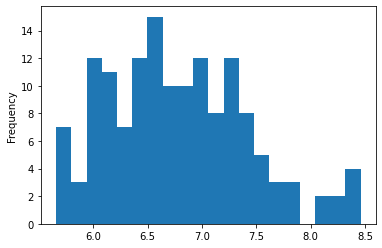

In [119]:
df_Mumbai["log_priceMod"] = np.log(df_Mumbai.priceMod)
df_Mumbai.log_priceMod.plot(kind="hist", bins=20)

<AxesSubplot:xlabel='date'>

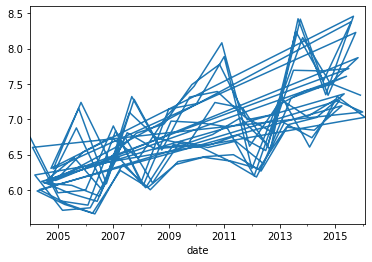

In [120]:
df_Mumbai.log_priceMod.plot()

In [121]:
df_Mumbai_mean = df_Mumbai.log_priceMod.mean()
df_Mumbai["mean_price"] = np.exp(df_Mumbai_mean)
df_Mumbai.head()


,month,quantity,priceMod,log_priceMod,mean_price
date,,,,,
2004-01,January,267100,849,7,889
2005-01,January,275845,387,6,889
2006-01,January,228000,402,6,889
2007-01,January,205200,997,7,889
2008-01,January,267550,448,6,889


In [122]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [123]:
mean_modelRMSE = RMSE(df_Mumbai.priceMod, df_Mumbai.mean_price)
mean_modelRMSE

908.4772843986449

In [124]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(df_Mumbai_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,889,908


In [137]:
ts = df_Mumbai.log_priceMod


In [138]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=20)
lag_acf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.31319668,  0.37165336, -0.06140673,  0.16869007,
       -0.02175521,  0.16634997,  0.01127215,  0.10597047, -0.07053858,
        0.27560045,  0.29894124,  0.78300906,  0.35419085,  0.29376392,
       -0.02414901,  0.1003445 ,  0.00663592,  0.1009527 ,  0.02262413,
        0.07107539])

# ACF Plot

<AxesSubplot:>

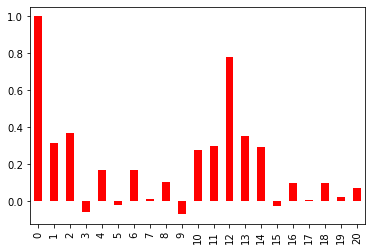

In [139]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

# PACF plot


<AxesSubplot:>

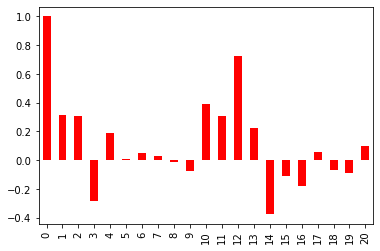

In [140]:
lag_pacf = pacf(ts, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")